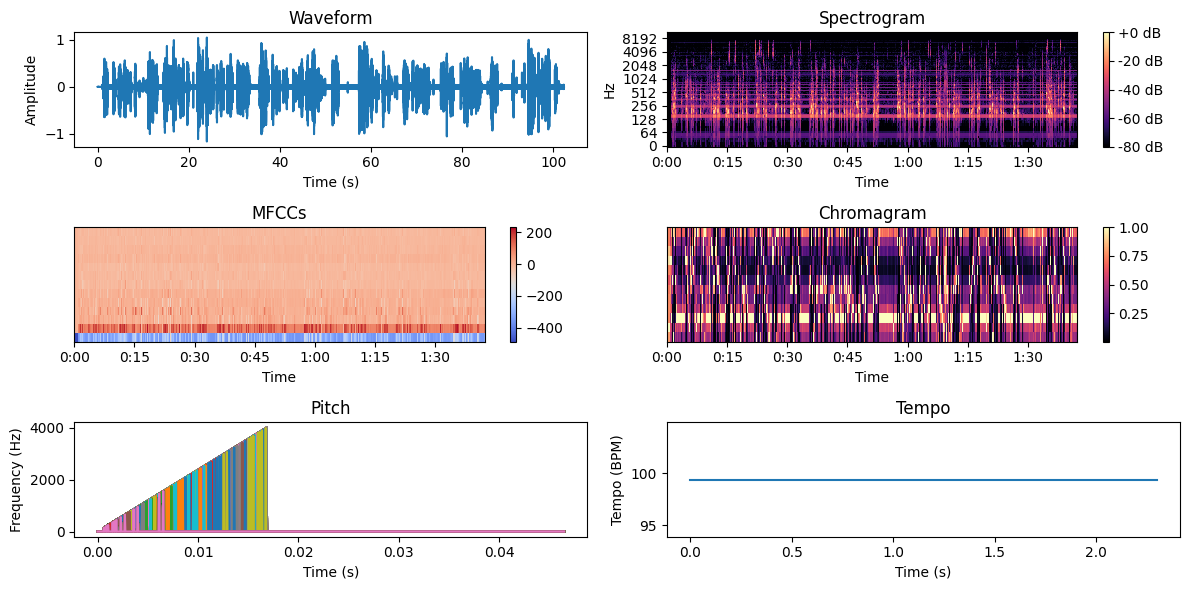

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
# audio_file = "/home/pratik/Desktop/Plaksha_Docs/Semester_4/MLPR/Projects/Italian Parkinson's Voice and speech/28 People with Parkinson's disease/Anna B/B1ABNINSAC46F240120171753.wav"
audio_file = "/home/pratik/Desktop/Plaksha_Docs/Semester_4/MLPR/Projects/Italian Parkinson's Voice and speech/22 Elderly Healthy Control/AGNESE P/B1APGANRET55F170320171104.wav"

y, sr = librosa.load(audio_file)

# Generate the time axis
time = np.arange(len(y)) / sr
# Generate the time axis for the tempo values
# Generate the time axis for the tempo values
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
hop_length = 512  # Adjust this value as needed
tempo_times = librosa.times_like(tempo, hop_length=hop_length, sr=sr)

# Repeat the tempo value to match the length of tempo_times
tempo = [tempo] * len(tempo_times)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.subplot(3, 2, 1)
plt.plot(time, y)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the spectrogram
plt.subplot(3, 2, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

# Plot the mel-frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.subplot(3, 2, 3)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')

# Plot the chromagram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
plt.subplot(3, 2, 4)
librosa.display.specshow(chromagram, x_axis='time')
plt.colorbar()
plt.title('Chromagram')

# Plot the pitch
plt.subplot(3, 2, 5)
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
plt.plot(time[:len(pitches)], pitches)
plt.title('Pitch')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Plot the tempo
plt.subplot(3, 2, 6)
plt.plot(tempo_times, tempo)
plt.title('Tempo')
plt.xlabel('Time (s)')
plt.ylabel('Tempo (BPM)')

plt.tight_layout()
plt.show()